<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/HTRU_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

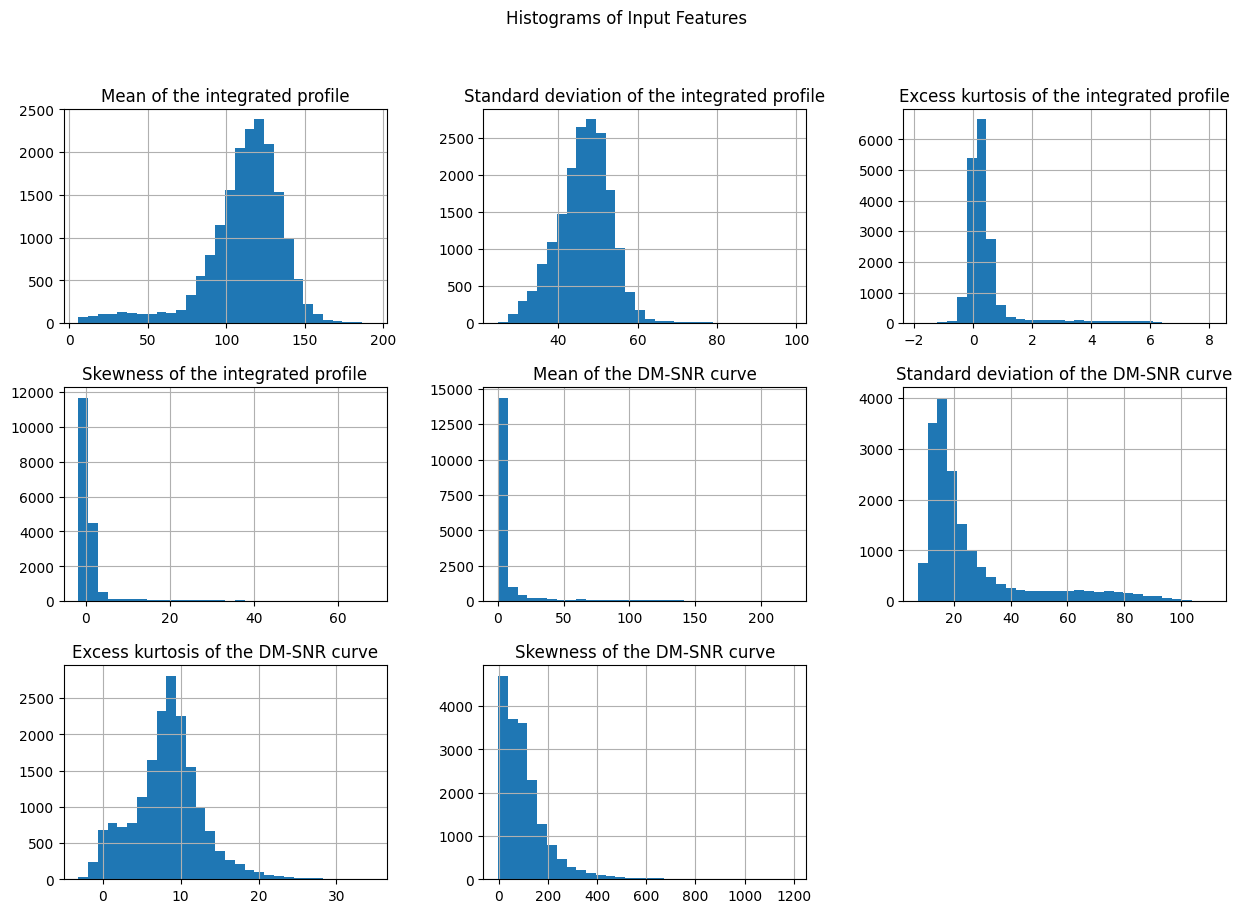

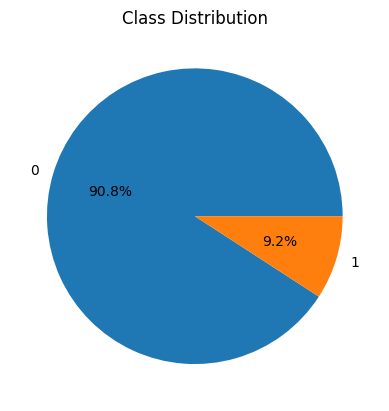

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Phase A

#-----Load the dataset
data = pd.read_csv('HTRU_2_AIDATASET.csv')

#-----Show distribution of each column

#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

# Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

#----- Normalize the dataset
data_normalized = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))



In [2]:
# Phase B

#-----Overfit the dataset
X = data_normalized.iloc[:, :-1]
y = data_normalized.iloc[:, -1]

''''
# Assuming 'model' is the overfitted model
train_probabilities_overfit = model.predict(X_train)
train_predictions_overfit = (train_probabilities_overfit > 0.5).astype('int32')

# Create a dataset from the overfitted model predictions
data_overfit = pd.DataFrame(np.hstack([X_train, train_predictions_overfit]), columns=data.columns)

# Histograms for input features
input_features = data_overfit.columns[:-1]
data_overfit[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features (Overfitted)")
plt.show()

# Pie chart for 'class' column
class_counts = data_overfit['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution (Overfitted)")
plt.show()
'''


#----- Train the dataset using logistic regression based on neural networks
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#-----Model checkpoint
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='accuracy', mode='max')

#-----Train the model
history = model.fit(X, y, epochs=20, batch_size=32, callbacks=[checkpoint])

#-----Calculate the accuracy
train_probabilities = model.predict(X)
train_predictions = (train_probabilities > 0.5).astype('int32')


def custom_accuracy(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    return np.sum(y_true == y_pred) / len(y_true)


train_accuracy = custom_accuracy(y, train_predictions)


Epoch 1/20
560/560 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.9084
Epoch 2/20
560/560 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9084
Epoch 3/20
560/560 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9111
Epoch 4/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9224
Epoch 5/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9345
Epoch 6/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9422
Epoch 7/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1533 - accuracy: 0.9480
Epoch 8/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9511
Epoch 9/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1378 - accuracy: 0.9532
Epoch 10/20
560/560 [==============================] - 1s 2ms/step - loss: 0.1321 - accuracy: 0.9552

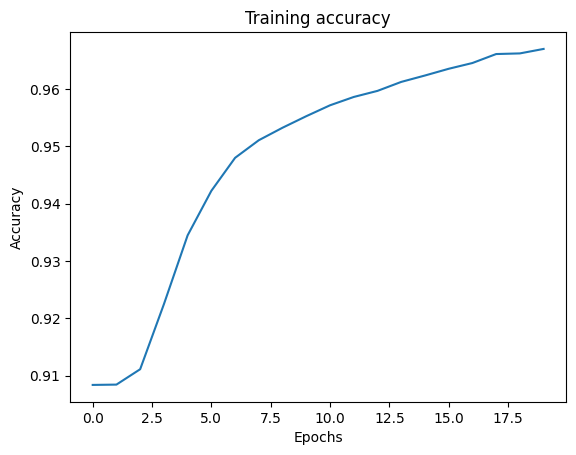

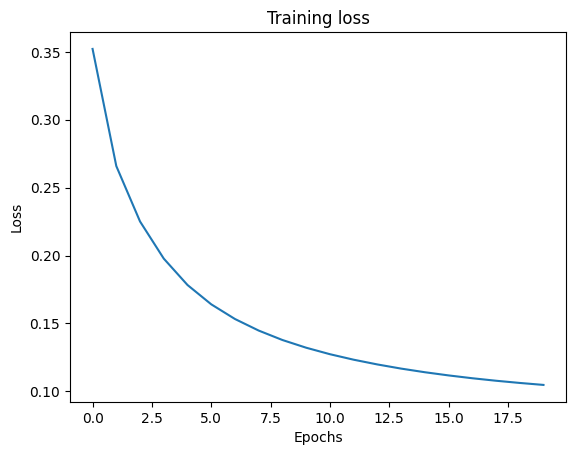

Epoch 1/30
448/448 [==============================] - 3s 4ms/step - loss: 0.2014 - accuracy: 0.9509 - val_loss: 0.1070 - val_accuracy: 0.9676
Epoch 2/30
448/448 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.9728 - val_loss: 0.0923 - val_accuracy: 0.9718
Epoch 3/30
448/448 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9751 - val_loss: 0.0909 - val_accuracy: 0.9698
Epoch 4/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9757 - val_loss: 0.0879 - val_accuracy: 0.9718
Epoch 5/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9760 - val_loss: 0.0907 - val_accuracy: 0.9704
Epoch 6/30
448/448 [==============================] - 2s 4ms/step - loss: 0.0823 - accuracy: 0.9759 - val_loss: 0.0864 - val_accuracy: 0.9751
Epoch 7/30
448/448 [==============================] - 2s 4ms/step - loss: 0.0816 - accuracy: 0.9763 - val_loss: 0.0841 - val_accuracy: 0.9743
Epoch 

In [3]:
# Phase C

#----Shuffle the dataset
data_shuffled = data_normalized.sample(frac=1).reset_index(drop=True)
X = data_shuffled.iloc[:, :-1]
y = data_shuffled.iloc[:, -1]

#----Split the dataset, test and validation
train_size = int(len(data_shuffled) * 0.8)
X_train = X[:train_size]
X_val = X[train_size:]
y_train = y[:train_size]
y_val = y[train_size:]

#-----Do plotting, graphs, visualization
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

#-----Grow multi layer model again for validation dataset
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#-----Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, callbacks=[checkpoint])

#-----Print accuracy and loss on both training and validation dataset
val_probabilities = model.predict(X_val)
val_predictions = (val_probabilities > 0.5).astype('int32')

val_accuracy = custom_accuracy(y_val, val_predictions)

train_probabilities = model.predict(X_train)
train_predictions = (train_probabilities > 0.5).astype('int32')

train_accuracy = custom_accuracy(y_train, train_predictions)

print("Training accuracy: {:.4f}".format(train_accuracy))
print("Validation accuracy: {:.4f}".format(val_accuracy))

#-----Print recall, precision, F1-score



def custom_recall(y_true, y_pred):
    y_true = np.array(y_true).squeeze()
    y_pred = np.array(y_pred).squeeze()
    assert len(y_true) == len(y_pred)
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def custom_precision(y_true, y_pred):
    y_true = np.array(y_true).squeeze()
    y_pred = np.array(y_pred).squeeze()
    assert len(y_true) == len(y_pred)
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def custom_f1_score(y_true, y_pred):
    precision = custom_precision(y_true, y_pred)
    recall = custom_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)
    

train_recall = custom_recall(y_train, train_predictions)
train_precision = custom_precision(y_train, train_predictions)
train_f1 = custom_f1_score(y_train, train_predictions)

val_recall = custom_recall(y_val, val_predictions)
val_precision = custom_precision(y_val, val_predictions)
val_f1 = custom_f1_score(y_val, val_predictions)

print("Training recall: {:.4f}".format(train_recall))
print("Training precision: {:.4f}".format(train_precision))
print("Training F1 score: {:.4f}".format(train_f1))

print("Validation recall: {:.4f}".format(val_recall))
print("Validation precision: {:.4f}".format(val_precision))
print("Validation F1 score: {:.4f}".format(val_f1))


Epoch 1/30
448/448 [==============================] - 1s 2ms/step - loss: 0.4984 - accuracy: 0.9087
Epoch 2/30
448/448 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.9087
Epoch 3/30
448/448 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.9087
Epoch 4/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.9087
Epoch 5/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9087
Epoch 6/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9087
Epoch 7/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.9087
Epoch 8/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2505 - accuracy: 0.9087
Epoch 9/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.9087
Epoch 10/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.9087

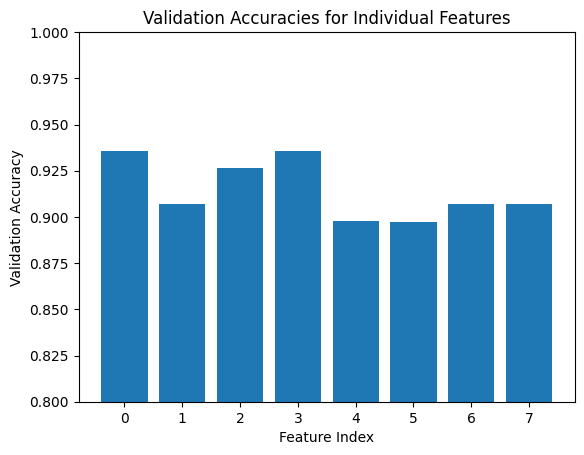

Epoch 1/30
448/448 [==============================] - 2s 3ms/step - loss: 0.6254 - accuracy: 0.8241
Epoch 2/30
448/448 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.9315
Epoch 3/30
448/448 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.9617
Epoch 4/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2887 - accuracy: 0.9668
Epoch 5/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2382 - accuracy: 0.9670
Epoch 6/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9677
Epoch 7/30
448/448 [==============================] - 1s 2ms/step - loss: 0.1801 - accuracy: 0.9674
Epoch 8/30
448/448 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9673
Epoch 9/30
448/448 [==============================] - 1s 2ms/step - loss: 0.1509 - accuracy: 0.9677
Epoch 10/30
448/448 [==============================] - 1s 2ms/step - loss: 0.1416 - accuracy: 0.9684

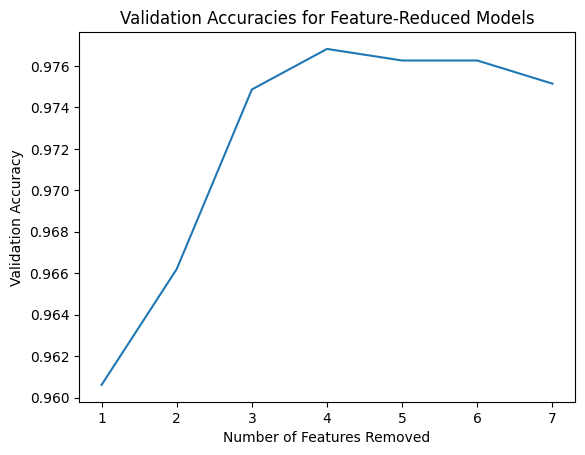

Original model validation accuracy: 0.9751396648044692
Best feature-reduced model validation accuracy: 0.9768156424581006


In [4]:
# Phase D

# Train models on individual features and plot validation accuracies
individual_accuracies = []
for i in range(X_train.shape[1]):
    X_train_single = X_train.iloc[:, i].values.reshape(-1, 1)
    X_val_single = X_val.iloc[:, i].values.reshape(-1, 1)

    # Train a model with a single feature
    single_feature_model = Sequential()
    single_feature_model.add(Dense(1, input_dim=1, activation='sigmoid'))
    single_feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    single_feature_model.fit(X_train_single, y_train, epochs=30, batch_size=32, verbose=1)

    # Calculate validation accuracy
    val_probabilities_single = single_feature_model.predict(X_val_single)
    val_predictions_single = (val_probabilities_single > 0.5).astype('int32')
    val_accuracy_single = custom_accuracy(y_val, val_predictions_single)
    individual_accuracies.append(val_accuracy_single)

# Plot the validation accuracies
plt.bar(range(len(individual_accuracies)), individual_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Validation Accuracies for Individual Features')
plt.show()

# Find the feature importance ranking
feature_importance = np.argsort(individual_accuracies)[::-1]

# Train models without unimportant features and plot validation accuracies
reduced_accuracies = []
for i in range(1, len(feature_importance)):
    important_features = feature_importance[:i]
    X_train_reduced = X_train.iloc[:, important_features]
    X_val_reduced = X_val.iloc[:, important_features]

    # Train a model with reduced features
    reduced_model = Sequential()
    reduced_model.add(Dense(16, input_dim=X_train_reduced.shape[1], activation='relu'))
    reduced_model.add(Dense(8, activation='relu'))
    reduced_model.add(Dense(1, activation='sigmoid'))
    reduced_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    reduced_model.fit(X_train_reduced, y_train, epochs=30, batch_size=32, verbose=1)

    # Calculate validation accuracy
    val_probabilities_reduced = reduced_model.predict(X_val_reduced)
    val_predictions_reduced = (val_probabilities_reduced > 0.5).astype('int32')
    val_accuracy_reduced = custom_accuracy(y_val, val_predictions_reduced)
    reduced_accuracies.append(val_accuracy_reduced)

# Plot the validation accuracies for reduced models
plt.plot(range(1, len(reduced_accuracies) + 1), reduced_accuracies)
plt.xlabel('Number of Features Removed')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracies for Feature-Reduced Models')
plt.show()

# Compare original model accuracy with feature-reduced model accuracy
print("Original model validation accuracy:", val_accuracy)
print("Best feature-reduced model validation accuracy:", max(reduced_accuracies))
